### Trabajo Fin de Grado - Laura Pombo Segura

---

*'Predicción de depresión desde síntomas psicológicos y emocionales'*

#### DATASET

Es una base de datos de 2600 personas que han realizado una encuesta dónde indican su grado de similitud con la emociones señaladas.

### 1. Ingeniería del dato

Esta primera fase dará comienzo con la limpieza y transformacion sobre la base de datos 'BurnDepressionChecklistDataset.xlsx'. 

---

1.1. Importamos librerías

In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

1.2. Importamos la base de datos

In [2]:
dep = pd.read_excel("BurnDepressionChecklistDataset.xlsx")
dep

,Feeling sad or down in the dumps,Feeling unhappy or blue,Crying spells or tearfulness,Feeling discouraged,Feeling hopeless,Low self-esteem,Feeling worthless or inadequate,Guilt or shame,Criticizing yourself or others,Difficulty making decisions,...,Avoiding work or other activities,Loss of pleasure or satisfaction in life,Feeling tired,Difficulty sleeping or sleeping too much,Decreased or increased appetite,Loss of interest in sex,Worrying about your health,Do you have any suicidal thoughts?,Would you like to end your life?,Do you have a plan for harming yourself?
0,0,2,0,2,0,0,4,4,3,2,...,0,1,1,3,1,4,3,1,4,0
1,4,3,3,3,2,1,1,0,0,1,...,4,2,2,4,1,3,0,2,2,0
2,3,0,0,3,3,2,1,3,3,2,...,4,0,1,4,4,4,1,1,0,3
3,1,4,2,0,4,4,3,1,3,0,...,1,2,2,1,0,4,3,0,0,0
4,1,1,1,1,4,2,1,4,2,4,...,4,2,0,2,3,2,4,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,1,0,4,3,1,1,0,4,4,1,...,2,0,0,4,3,0,0,2,1,2
2596,2,1,3,1,3,0,4,4,2,1,...,4,2,2,1,2,3,4,4,3,2
2597,0,4,1,4,1,2,1,1,1,0,...,3,1,1,4,3,4,3,0,2,2
2598,1,1,3,2,1,2,3,3,1,2,...,4,4,4,3,3,4,2,2,1,1


In [3]:
# Visualizamos el nombre de las variables
print(dep.columns)

Index(['Feeling sad or down in the dumps', 'Feeling unhappy or blue',
       'Crying spells or tearfulness', 'Feeling discouraged',
       'Feeling hopeless', 'Low self-esteem',
       'Feeling worthless or inadequate', 'Guilt or shame',
       'Criticizing yourself or others', 'Difficulty making decisions',
       'Loss of interest in family, friends or colleagues',
       'Loneliness feeling', 'Spending less time with family or friends',
       'Loss of motivation', 'Loss of interest in work or other activities',
       'Avoiding work or other activities',
       'Loss of pleasure or satisfaction in life', 'Feeling tired',
       'Difficulty sleeping or sleeping too much',
       'Decreased or increased appetite', 'Loss of interest in sex',
       'Worrying about your health', 'Do you have any suicidal thoughts?',
       'Would you like to end your life?',
       'Do you have a plan for harming yourself? '],
      dtype='object')


**GRÁFICOS INTERESANTES**

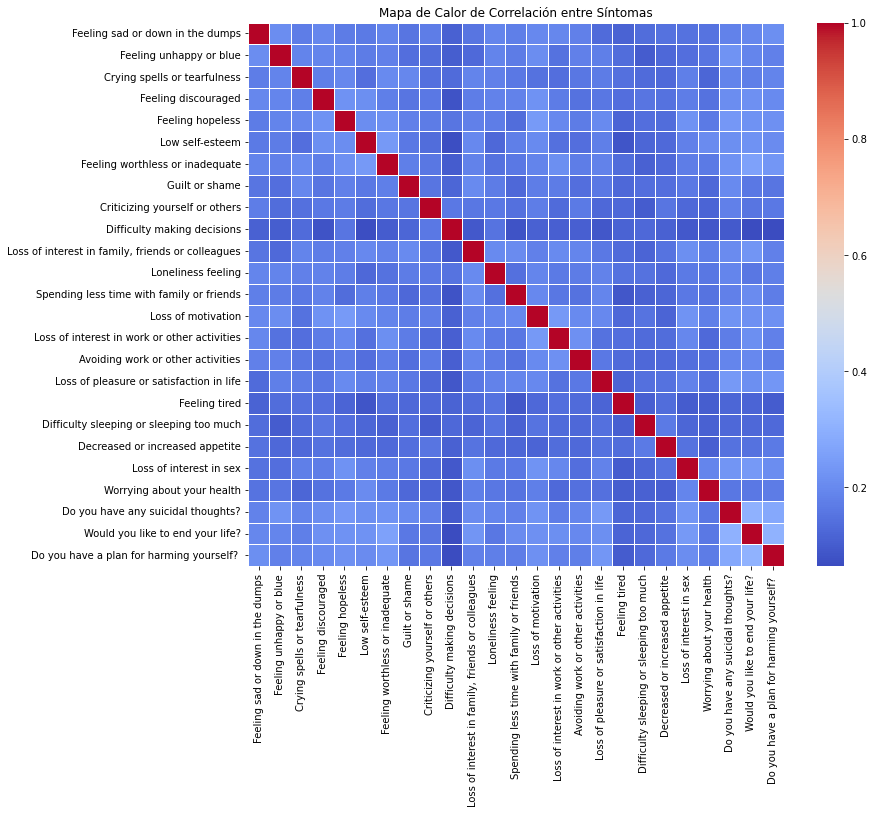

In [4]:
# Mapa de calor de correlación entre síntomas
plt.figure(figsize=(12, 10))
correlation_matrix = dep.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlación entre Síntomas')
plt.show()

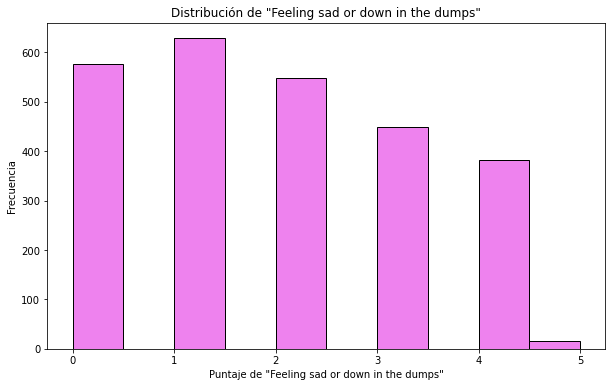

In [5]:
# Seleccionaremos una de las columnas de síntomas, como 'Feeling sad or down in the dumps'.
plt.figure(figsize=(10, 6))
plt.hist(dep['Feeling sad or down in the dumps'], bins=10, color='violet', edgecolor='black')
plt.title('Distribución de "Feeling sad or down in the dumps"')
plt.xlabel('Puntaje de "Feeling sad or down in the dumps"')
plt.ylabel('Frecuencia')
plt.show()

1.3. Añadimos columnas adicionales

In [7]:
# Primera nueva variable que contiene la suma de todos los valores de cada fila
dep['Depressive Total Score'] = dep.sum(axis=1)
dep

,Feeling sad or down in the dumps,Feeling unhappy or blue,Crying spells or tearfulness,Feeling discouraged,Feeling hopeless,Low self-esteem,Feeling worthless or inadequate,Guilt or shame,Criticizing yourself or others,Difficulty making decisions,...,Loss of pleasure or satisfaction in life,Feeling tired,Difficulty sleeping or sleeping too much,Decreased or increased appetite,Loss of interest in sex,Worrying about your health,Do you have any suicidal thoughts?,Would you like to end your life?,Do you have a plan for harming yourself?,Depressive Total Score
0,0,2,0,2,0,0,4,4,3,2,...,1,1,3,1,4,3,1,4,0,96
1,4,3,3,3,2,1,1,0,0,1,...,2,2,4,1,3,0,2,2,0,92
2,3,0,0,3,3,2,1,3,3,2,...,0,1,4,4,4,1,1,0,3,104
3,1,4,2,0,4,4,3,1,3,0,...,2,2,1,0,4,3,0,0,0,102
4,1,1,1,1,4,2,1,4,2,4,...,2,0,2,3,2,4,0,1,1,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,1,0,4,3,1,1,0,4,4,1,...,0,0,4,3,0,0,2,1,2,88
2596,2,1,3,1,3,0,4,4,2,1,...,2,2,1,2,3,4,4,3,2,120
2597,0,4,1,4,1,2,1,1,1,0,...,1,1,4,3,4,3,0,2,2,98
2598,1,1,3,2,1,2,3,3,1,2,...,4,4,3,3,4,2,2,1,1,118


In [8]:
# Segunda variable que muestra si esa persona tiene depresión o no
depressive_diagnosis = []

num = 50

for score in dep['Depressive Total Score']:
    if score > num:
        depressive_diagnosis.append('YES')
    else:
        depressive_diagnosis.append('NO')
        
dep['Depressive Diagnosis'] = depressive_diagnosis
dep

,Feeling sad or down in the dumps,Feeling unhappy or blue,Crying spells or tearfulness,Feeling discouraged,Feeling hopeless,Low self-esteem,Feeling worthless or inadequate,Guilt or shame,Criticizing yourself or others,Difficulty making decisions,...,Feeling tired,Difficulty sleeping or sleeping too much,Decreased or increased appetite,Loss of interest in sex,Worrying about your health,Do you have any suicidal thoughts?,Would you like to end your life?,Do you have a plan for harming yourself?,Depressive Total Score,Depressive Diagnosis
0,0,2,0,2,0,0,4,4,3,2,...,1,3,1,4,3,1,4,0,96,YES
1,4,3,3,3,2,1,1,0,0,1,...,2,4,1,3,0,2,2,0,92,YES
2,3,0,0,3,3,2,1,3,3,2,...,1,4,4,4,1,1,0,3,104,YES
3,1,4,2,0,4,4,3,1,3,0,...,2,1,0,4,3,0,0,0,102,YES
4,1,1,1,1,4,2,1,4,2,4,...,0,2,3,2,4,0,1,1,104,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,1,0,4,3,1,1,0,4,4,1,...,0,4,3,0,0,2,1,2,88,YES
2596,2,1,3,1,3,0,4,4,2,1,...,2,1,2,3,4,4,3,2,120,YES
2597,0,4,1,4,1,2,1,1,1,0,...,1,4,3,4,3,0,2,2,98,YES
2598,1,1,3,2,1,2,3,3,1,2,...,4,3,3,4,2,2,1,1,118,YES


1.4. Comprobamos si hay valores faltantes 

In [9]:
is_null = dep.isnull().sum()
is_null

Feeling sad or down in the dumps                     0
Feeling unhappy or blue                              0
Crying spells or tearfulness                         0
Feeling discouraged                                  0
Feeling hopeless                                     0
Low self-esteem                                      0
Feeling worthless or inadequate                      0
Guilt or shame                                       0
Criticizing yourself or others                       0
Difficulty making decisions                          0
Loss of interest in family, friends or colleagues    0
Loneliness feeling                                   0
Spending less time with family or friends            0
Loss of motivation                                   0
Loss of interest in work or other activities         0
Avoiding work or other activities                    0
Loss of pleasure or satisfaction in life             0
Feeling tired                                        0
Difficulty

1.5. Comprobamos valores infinitos

In [10]:
# Verificar si hay valores infinitos en el DataFrame
infinite_values = dep.isin([np.inf, -np.inf]).sum().sum()

print("Número de valores infinitos en el dataset:", infinite_values)

Número de valores infinitos en el dataset: 0


No haría falta eliminar valores infinitos o nulos ya que no muestra presencia de ninguno

1.6 Eliminar variables irrelevantes

In [11]:
irrelevant_columns = ['Feeling unhappy or blue', 'Spending less time with family or friends', 'Avoiding work or other activities', 'Loss of interest in sex', 'Would you like to end your life?', 'Loss of motivation']

dep.drop(columns=irrelevant_columns, inplace=True)

dep

,Feeling sad or down in the dumps,Crying spells or tearfulness,Feeling discouraged,Feeling hopeless,Low self-esteem,Feeling worthless or inadequate,Guilt or shame,Criticizing yourself or others,Difficulty making decisions,"Loss of interest in family, friends or colleagues",...,Loss of interest in work or other activities,Loss of pleasure or satisfaction in life,Feeling tired,Difficulty sleeping or sleeping too much,Decreased or increased appetite,Worrying about your health,Do you have any suicidal thoughts?,Do you have a plan for harming yourself?,Depressive Total Score,Depressive Diagnosis
0,0,0,2,0,0,4,4,3,2,3,...,4,1,1,3,1,3,1,0,96,YES
1,4,3,3,2,1,1,0,0,1,1,...,2,2,2,4,1,0,2,0,92,YES
2,3,0,3,3,2,1,3,3,2,2,...,1,0,1,4,4,1,1,3,104,YES
3,1,2,0,4,4,3,1,3,0,4,...,2,2,2,1,0,3,0,0,102,YES
4,1,1,1,4,2,1,4,2,4,4,...,3,2,0,2,3,4,0,1,104,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,1,4,3,1,1,0,4,4,1,3,...,0,0,0,4,3,0,2,2,88,YES
2596,2,3,1,3,0,4,4,2,1,3,...,4,2,2,1,2,4,4,2,120,YES
2597,0,1,4,1,2,1,1,1,0,0,...,3,1,1,4,3,3,0,2,98,YES
2598,1,3,2,1,2,3,3,1,2,2,...,1,4,4,3,3,2,2,1,118,YES


Se van a convertir los datos para el modelo de aprendizaje a float, pero para la variable objetivo posteriormente se quedará en int

1.8. Convertimos los datos a tipo flotante para los modelos

In [12]:
columns_to_convert = [col for col in dep.columns if col != 'Depressive Diagnosis']

dep[columns_to_convert] = dep[columns_to_convert].astype(float)

print(dep.dtypes)

Feeling sad or down in the dumps                     float64
Crying spells or tearfulness                         float64
Feeling discouraged                                  float64
Feeling hopeless                                     float64
Low self-esteem                                      float64
Feeling worthless or inadequate                      float64
Guilt or shame                                       float64
Criticizing yourself or others                       float64
Difficulty making decisions                          float64
Loss of interest in family, friends or colleagues    float64
Loneliness feeling                                   float64
Loss of interest in work or other activities         float64
Loss of pleasure or satisfaction in life             float64
Feeling tired                                        float64
Difficulty sleeping or sleeping too much             float64
Decreased or increased appetite                      float64
Worrying about your heal

1.9. Estandarizar los datos

In [13]:
std_columns = [col for col in dep.columns if col != 'Depressive Diagnosis']

scaler = StandardScaler()

# Ajustar y transformar las columnas seleccionadas
dep[std_columns] = scaler.fit_transform(dep[std_columns])

dep.head()

,Feeling sad or down in the dumps,Crying spells or tearfulness,Feeling discouraged,Feeling hopeless,Low self-esteem,Feeling worthless or inadequate,Guilt or shame,Criticizing yourself or others,Difficulty making decisions,"Loss of interest in family, friends or colleagues",...,Loss of interest in work or other activities,Loss of pleasure or satisfaction in life,Feeling tired,Difficulty sleeping or sleeping too much,Decreased or increased appetite,Worrying about your health,Do you have any suicidal thoughts?,Do you have a plan for harming yourself?,Depressive Total Score,Depressive Diagnosis
0,-1.304538,-1.291316,0.202272,-1.257520,-1.202286,1.625905,1.563247,0.853003,0.008821,0.917355,...,1.583461,-0.551891,-0.714179,0.778739,-0.650012,0.893988,-0.392119,-1.062159,0.244454,YES
1,1.594435,0.846715,0.924672,0.155119,-0.489251,-0.514166,-1.310674,-1.310712,-0.707887,-0.494796,...,0.144203,0.179836,0.030653,1.507056,-0.650012,-1.293311,0.285296,-1.062159,0.115337,YES
2,0.869692,-1.291316,0.924672,0.861438,0.223783,-0.514166,0.844767,0.853003,0.008821,0.211280,...,-0.575427,-1.283619,-0.714179,1.507056,1.600362,-0.564211,-0.392119,1.042730,0.502689,YES
3,-0.579794,0.134038,-1.242528,1.567757,1.649852,0.912548,-0.592193,0.853003,-1.424596,1.623431,...,0.144203,0.179836,0.030653,-0.677895,-1.400136,0.893988,-1.069534,-1.062159,0.438130,YES
4,-0.579794,-0.578639,-0.520128,1.567757,0.223783,-0.514166,1.563247,0.131765,1.442238,1.623431,...,0.863832,0.179836,-1.459010,0.050422,0.850237,1.623088,-1.069534,-0.360530,0.502689,YES


1.10. Tipología de los datos

In [14]:
dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 21 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Feeling sad or down in the dumps                   2600 non-null   float64
 1   Crying spells or tearfulness                       2600 non-null   float64
 2   Feeling discouraged                                2600 non-null   float64
 3   Feeling hopeless                                   2600 non-null   float64
 4   Low self-esteem                                    2600 non-null   float64
 5   Feeling worthless or inadequate                    2600 non-null   float64
 6   Guilt or shame                                     2600 non-null   float64
 7   Criticizing yourself or others                     2600 non-null   float64
 8   Difficulty making decisions                        2600 non-null   float64
 9   Loss of 

In [15]:
# Analizamos la cantidad de observaciones por cada valor observado en cada columna
for col in dep.columns.tolist():
    print(f"\033[1m{col} \n{20 * '-'}\033[0m")
    print(dep[col].value_counts(), '\n')

Feeling sad or down in the dumps 
--------------------
-0.579794    629
-1.304538    576
 0.144949    548
 0.869692    449
 1.594435    382
 2.319178     16
Name: Feeling sad or down in the dumps, dtype: int64 

Crying spells or tearfulness 
--------------------
-1.291316    605
-0.578639    596
 0.134038    511
 0.846715    469
 1.559392    409
 2.272070     10
Name: Crying spells or tearfulness, dtype: int64 

Feeling discouraged 
--------------------
-0.520128    664
-1.242528    626
 0.202272    526
 0.924672    391
 1.647072    382
 2.369473     11
Name: Feeling discouraged, dtype: int64 

Feeling hopeless 
--------------------
-1.257520    638
-0.551201    596
 0.155119    495
 0.861438    455
 1.567757    402
 2.274077     14
Name: Feeling hopeless, dtype: int64 

Low self-esteem 
--------------------
-1.202286    683
-0.489251    645
 0.223783    467
 0.936818    424
 1.649852    372
 2.362886      9
Name: Low self-esteem, dtype: int64 

Feeling worthless or inadequate 
-------

1.11. Resumen estadístico

In [16]:
print(dep.describe(include='all', percentiles=[]))

        Feeling sad or down in the dumps  Crying spells or tearfulness  \
count                       2.600000e+03                  2.600000e+03   
unique                               NaN                           NaN   
top                                  NaN                           NaN   
freq                                 NaN                           NaN   
mean                       -1.583349e-15                  9.537670e-16   
std                         1.000192e+00                  1.000192e+00   
min                        -1.304538e+00                 -1.291316e+00   
50%                         1.449486e-01                  1.340381e-01   
max                         2.319178e+00                  2.272070e+00   

        Feeling discouraged  Feeling hopeless  Low self-esteem  \
count          2.600000e+03      2.600000e+03     2.600000e+03   
unique                  NaN               NaN              NaN   
top                     NaN               NaN              Na

**GRÁFICOS ADICIONALES**

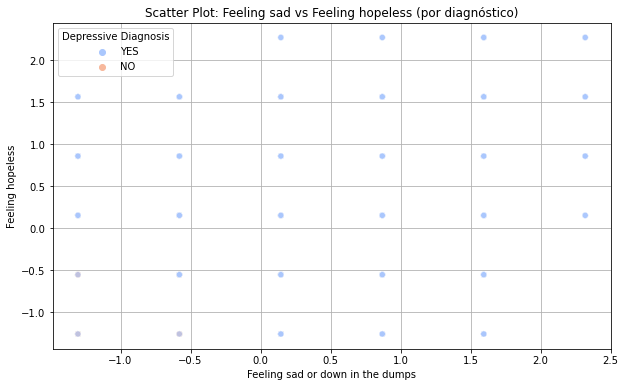

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=dep['Feeling sad or down in the dumps'], 
    y=dep['Feeling hopeless'], 
    hue=dep['Depressive Diagnosis'],  
    palette='coolwarm',
    alpha=0.7
    )

plt.title('Scatter Plot: Feeling sad vs Feeling hopeless (por diagnóstico)')
plt.xlabel('Feeling sad or down in the dumps')
plt.ylabel('Feeling hopeless')
plt.grid(True)
plt.legend(title='Depressive Diagnosis')
plt.show()

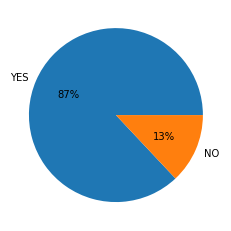

In [18]:
labels = ['YES', 'NO']
plt.pie(dep['Depressive Diagnosis'].value_counts(), labels = labels , autopct = '%0.0f%%')
plt.show()

### 2. Análisis del dato

Esta segunda fase de análisis del dato, vamos a emplear tres modelos diferentes: xxxxxxxxxxxxx para poder comparar estos tres modelos utilizados y finalmente poder saber cuál es el más preciso.

Importamos librerías

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, classification_report, f1_score, roc_auc_score

**SEPARAMOS LOS DATOS -- TRAIN | TEST**

In [87]:
# Separamos el conjunto de datos en train 80% y test 20%
train, test = train_test_split(dep, test_size = 0.2, shuffle = True)

In [175]:
# Asegurarse de que no haya filas comunes
common_rows = train.merge(test, how='inner')
print("Filas comunes:", len(common_rows))

Filas comunes: 26


In [89]:
print('Train data size: ', train.shape)
print('Test data size: ', test.shape)

Train data size:  (2080, 21)
Test data size:  (520, 21)


In [90]:
print(train.columns.tolist())

['Feeling sad or down in the dumps', 'Crying spells or tearfulness', 'Feeling discouraged', 'Feeling hopeless', 'Low self-esteem', 'Feeling worthless or inadequate', 'Guilt or shame', 'Criticizing yourself or others', 'Difficulty making decisions', 'Loss of interest in family, friends or colleagues', 'Loneliness feeling', 'Loss of interest in work or other activities', 'Loss of pleasure or satisfaction in life', 'Feeling tired', 'Difficulty sleeping or sleeping too much', 'Decreased or increased appetite', 'Worrying about your health', 'Do you have any suicidal thoughts?', 'Do you have a plan for harming yourself? ', 'Depressive Total Score', 'Depressive Diagnosis']


2.1 Indicamos la variable dependiente

In [91]:
x_train = train[['Feeling sad or down in the dumps', 'Crying spells or tearfulness', 'Feeling discouraged', 'Feeling hopeless', 'Low self-esteem', 'Feeling worthless or inadequate', 'Guilt or shame', 'Criticizing yourself or others', 'Difficulty making decisions', 'Loss of interest in family, friends or colleagues', 'Loneliness feeling', 'Loss of interest in work or other activities', 'Loss of pleasure or satisfaction in life', 'Feeling tired', 'Difficulty sleeping or sleeping too much', 'Decreased or increased appetite', 'Worrying about your health', 'Do you have any suicidal thoughts?', 'Do you have a plan for harming yourself? ', 'Depressive Total Score']]
y_train = train['Depressive Diagnosis']
x_test = test[['Feeling sad or down in the dumps', 'Crying spells or tearfulness', 'Feeling discouraged', 'Feeling hopeless', 'Low self-esteem', 'Feeling worthless or inadequate', 'Guilt or shame', 'Criticizing yourself or others', 'Difficulty making decisions', 'Loss of interest in family, friends or colleagues', 'Loneliness feeling', 'Loss of interest in work or other activities', 'Loss of pleasure or satisfaction in life', 'Feeling tired', 'Difficulty sleeping or sleeping too much', 'Decreased or increased appetite', 'Worrying about your health', 'Do you have any suicidal thoughts?', 'Do you have a plan for harming yourself? ', 'Depressive Total Score']]
y_test = test['Depressive Diagnosis']

In [92]:
print(y_train.value_counts(), '\n')
print(y_test.value_counts(), '\n')

YES    1804
NO      276
Name: Depressive Diagnosis, dtype: int64 

YES    458
NO      62
Name: Depressive Diagnosis, dtype: int64 



2.2 Convertimos los valores de la variable objetivo en 0 y 1

In [93]:
#Convertimos los datos de la variable dependiente y en valores 0 o 1
y_train.loc[y_train == 'NO'] = 0 
y_train.loc[y_train == 'YES'] = 1

print(y_train.value_counts())

1    1804
0     276
Name: Depressive Diagnosis, dtype: int64


C:\Users\Laura\AppData\Local\Temp\ipykernel_9504\413777712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train.loc[y_train == 'NO'] = 0
C:\Users\Laura\AppData\Local\Temp\ipykernel_9504\413777712.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train.loc[y_train == 'YES'] = 1


In [94]:
# Hacemos lo mismo con test
y_test.loc[y_test == 'NO'] = 0 
y_test.loc[y_test == 'YES'] = 1

print(y_test.value_counts())

1    458
0     62
Name: Depressive Diagnosis, dtype: int64


C:\Users\Laura\AppData\Local\Temp\ipykernel_9504\2527448632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test.loc[y_test == 'NO'] = 0
C:\Users\Laura\AppData\Local\Temp\ipykernel_9504\2527448632.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test.loc[y_test == 'YES'] = 1


In [110]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [111]:
# Eliminar la columna 'Depressive Total Score' del conjunto de datos por sobreajuste
x_train_without_total = x_train.drop(columns=['Depressive Total Score'])
x_test_without_total = x_test.drop(columns=['Depressive Total Score'])

**Árboles de decisión**

In [113]:
from sklearn.tree import DecisionTreeClassifier
# ÁRBOL DE DECISIÓN

# Creamos el arbol de decisión
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3,  
                              min_samples_split=20,  min_samples_leaf=10,  
                              random_state=43)

# Entrenamos el modelo
tree.fit(x_train_without_total, y_train)

# Predecimos el modelo
y_pred_test_tree = tree.predict(x_test_without_total)

Medidas de error y/o precisión

In [152]:
accuracy_test = accuracy_score(y_test, y_pred_test_tree)
precision_test = precision_score(y_test, y_pred_test_tree)
recall_test = recall_score(y_test, y_pred_test_tree)
f1_test = f1_score(y_test, y_pred_test_tree)
roc_auc_test = roc_auc_score(y_test, y_pred_test_tree)

print("Accuracy: {:.3f}".format(accuracy_test))
print("Precision: {:.3f}".format(precision_test))
print("Recall: {:.3f}".format(recall_test))
print("F1-score: {:.3f}".format(f1_test))
print("ROC AUC: {:.3f}".format(roc_auc_test))
print(classification_report(y_pred_test_knn, y_test))
cm_knn = confusion_matrix(y_test, y_pred_test_knn)

Accuracy: 0.929
Precision: 0.939
Recall: 0.983
F1-score: 0.961
ROC AUC: 0.757
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        60
           1       0.99      0.99      0.99       460

    accuracy                           0.98       520
   macro avg       0.95      0.96      0.95       520
weighted avg       0.98      0.98      0.98       520



Matriz de confusión

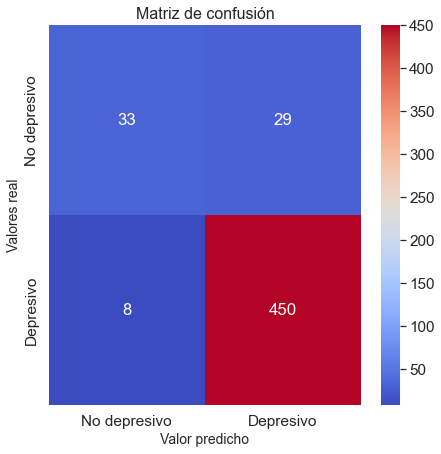

In [120]:
#MATRIZ DE CONFUSIÓN
# Configuramos el estilo de la tabla
sns.set(style='whitegrid', font_scale=1.4)

# Creamos la tabla con colores
fig, ax = plt.subplots(figsize=(7, 7))
ax = sns.heatmap(cm_tree, annot=True, cmap='coolwarm', fmt='g', cbar=True)

# Configuramos los títulos y etiquetas
ax.set_xlabel('Valor predicho', fontsize=14)
ax.set_ylabel('Valores real', fontsize=14)
ax.set_title('Matriz de confusión', fontsize=16)
ax.xaxis.set_ticklabels(['No depresivo', 'Depresivo'])
ax.yaxis.set_ticklabels(['No depresivo', 'Depresivo'])

plt.show()

**K-Nearest Neighbors (KNN)**

In [154]:
from sklearn.neighbors import KNeighborsClassifier
# KNN
# Creamos el modelo de KNN
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', 
                           leaf_size=30, p=2, metric='minkowski', 
                           metric_params=None, n_jobs=None)

# Entrenamos el modelo
knn.fit(x_train_without_total, y_train)

#Predecimos el modelo
y_pred_test_knn = knn.predict(x_test_without_total)

Medidas de error y/o precisión

In [155]:
accuracy_test = accuracy_score(y_test, y_pred_test_knn)
precision_test = precision_score(y_test, y_pred_test_knn)
recall_test = recall_score(y_test, y_pred_test_knn)
f1_test = f1_score(y_test, y_pred_test_knn)
roc_auc_test = roc_auc_score(y_test, y_pred_test_knn)

print("Accuracy: {:.3f}".format(accuracy_test))
print("Precision: {:.3f}".format(precision_test))
print("Recall: {:.3f}".format(recall_test))
print("F1-score: {:.3f}".format(f1_test))
print("ROC AUC: {:.3f}".format(roc_auc_test))
print(classification_report(y_pred_test_knn, y_test))
cm_knn = confusion_matrix(y_test, y_pred_test_knn)

Accuracy: 0.981
Precision: 0.987
Recall: 0.991
F1-score: 0.989
ROC AUC: 0.947
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        60
           1       0.99      0.99      0.99       460

    accuracy                           0.98       520
   macro avg       0.95      0.96      0.95       520
weighted avg       0.98      0.98      0.98       520



Matriz de confusión

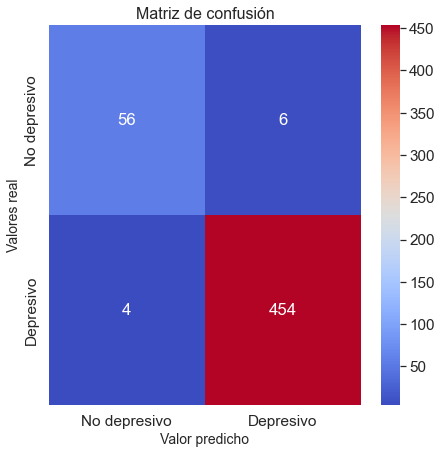

In [156]:
#MATRIZ DE CONFUSIÓN
# Configuramos el estilo de la tabla
sns.set(style='whitegrid', font_scale=1.4)

# Creamos la tabla con colores
fig, ax = plt.subplots(figsize=(7, 7))
ax = sns.heatmap(cm_knn, annot=True, cmap='coolwarm', fmt='g', cbar=True)

# Configuramos los títulos y etiquetas
ax.set_xlabel('Valor predicho', fontsize=14)
ax.set_ylabel('Valores real', fontsize=14)
ax.set_title('Matriz de confusión', fontsize=16)
ax.xaxis.set_ticklabels(['No depresivo', 'Depresivo'])
ax.yaxis.set_ticklabels(['No depresivo', 'Depresivo'])

plt.show()

**Regresión Logística**

In [159]:
from sklearn.linear_model import LogisticRegression
# Regresión Logística
# Creamos el modelo de regresion logistica
lr = LogisticRegression(penalty='l2',  C=0.1,  solver='liblinear',   
                        max_iter=200, random_state=43,
                        fit_intercept=True,  class_weight='balanced',
                        warm_start=False)

# Entrenamos el modelo
lr.fit(x_train_without_total, y_train)

# Predecimos el modelo
y_pred_test_lr = lr.predict(x_test_without_total)

Medidas de error y/o precisión

In [160]:
accuracy_test = accuracy_score(y_test, y_pred_test_lr)
precision_test = precision_score(y_test, y_pred_test_lr)
recall_test = recall_score(y_test, y_pred_test_lr)
f1_test = f1_score(y_test, y_pred_test_lr)
roc_auc_test = roc_auc_score(y_test, y_pred_test_lr)

print("Accuracy: {:.3f}".format(accuracy_test))
print("Precision: {:.3f}".format(precision_test))
print("Recall: {:.3f}".format(recall_test))
print("F1-score: {:.3f}".format(f1_test))
print("ROC AUC: {:.3f}".format(roc_auc_test))
print(classification_report(y_pred_test_lr, y_test))
cm_lr = confusion_matrix(y_test, y_pred_test_lr)

Accuracy: 0.971
Precision: 1.000
Recall: 0.967
F1-score: 0.983
ROC AUC: 0.984
              precision    recall  f1-score   support

           0       1.00      0.81      0.89        77
           1       0.97      1.00      0.98       443

    accuracy                           0.97       520
   macro avg       0.98      0.90      0.94       520
weighted avg       0.97      0.97      0.97       520



Matriz de confusión

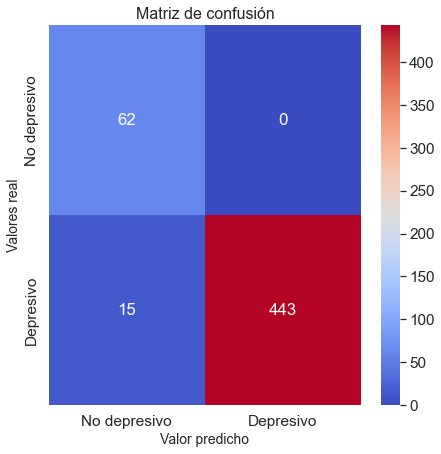

In [161]:
#MATRIZ DE CONFUSION
# Configuramos el estilo de la tabla
sns.set(style='whitegrid', font_scale=1.4)

# Creamos la tabla con colores
fig, ax = plt.subplots(figsize=(7, 7))
ax = sns.heatmap(cm_lr, annot=True, cmap='coolwarm', fmt='g', cbar=True)

# Configuramos los títulos y etiquetas
ax.set_xlabel('Valor predicho', fontsize=14)
ax.set_ylabel('Valores real', fontsize=14)
ax.set_title('Matriz de confusión', fontsize=16)
ax.xaxis.set_ticklabels(['No depresivo', 'Depresivo'])
ax.yaxis.set_ticklabels(['No depresivo', 'Depresivo'])

plt.show()

#### IMPORTANCIA DE LAS VARIABLES

                                              Feature  Importance
9   Loss of interest in family, friends or colleagues    0.009615
11       Loss of interest in work or other activities    0.008654
0                    Feeling sad or down in the dumps    0.008269
18          Do you have a plan for harming yourself?     0.008269
4                                     Low self-esteem    0.007500
12           Loss of pleasure or satisfaction in life    0.006346
16                         Worrying about your health    0.005385
10                                 Loneliness feeling    0.005000
2                                 Feeling discouraged    0.004615
15                    Decreased or increased appetite    0.004615


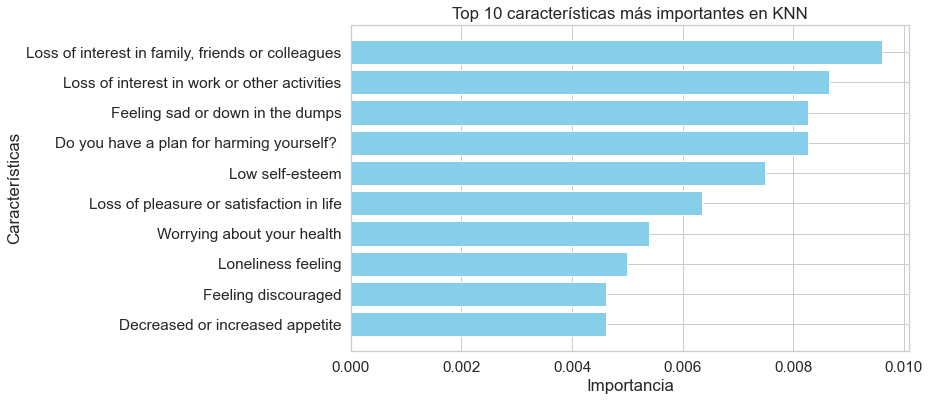

In [173]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

# Calcular la importancia por permutación para el modelo KNN
perm_importance = permutation_importance(knn, x_test_without_total, y_test, scoring='accuracy', n_repeats=10, random_state=43)

# Crear un DataFrame con las variables y su importancia
importance_df = pd.DataFrame({
    'Feature': x_test_without_total.columns,
    'Importance': perm_importance.importances_mean
})

# Ordenar las variables por importancia y mostrar las 10 principales
top_importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Filtrar solo las dos variables de interés
specific_importance = importance_df[importance_df['Feature'].isin(['Feeling sad or down in the dumps', 'Loneliness feeling'])]

# Mostrar las 10 variables más relevantes
print(top_importance_df)

# Visualizar las 10 variables más relevantes
plt.figure(figsize=(10, 6))
plt.barh(top_importance_df['Feature'], top_importance_df['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Top 10 características más importantes en KNN')
plt.gca().invert_yaxis()
plt.show()

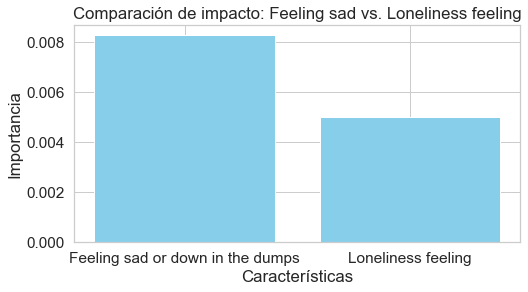

In [174]:
# Gráfico comparativo
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.bar(specific_importance['Feature'], specific_importance['Importance'], color='skyblue')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Comparación de impacto: Feeling sad vs. Loneliness feeling')
plt.show()